# Introduction

This notebookprocesses the [Alibaba microservice traces from 2021](https://github.com/alibaba/clusterdata/tree/master/cluster-trace-microservices-v2021) to generate traces aggregated in periods of 1 hour and with localization information.

In [2]:
import glob
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Data fetching

In order to save space, not all the traces are downloaded. Only the data about MSRTQps is fetched. This will take several minutes for each file, hours for the whole set. In addition, several Gigabytes are required to store the files.

In [3]:
url = "http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces"

for i in range(25):
    command = f"wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 {url}/MSRTQps/MSRTQps_{i}.tar.gz"
    print(command)
    os.system(command)

wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_0.tar.gz


2023-03-23 11:45:27 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_0.tar.gz [846329272/846329272] -> "MSRTQps_0.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_1.tar.gz


2023-03-23 11:52:29 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_1.tar.gz [845625495/845625495] -> "MSRTQps_1.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_2.tar.gz


2023-03-23 12:00:52 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_2.tar.gz [839953804/839953804] -> "MSRTQps_2.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_3.tar.gz


2023-03-23 12:07:36 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_3.tar.gz [847128080/847128080] -> "MSRTQps_3.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_4.tar.gz


2023-03-23 12:16:09 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_4.tar.gz [857758385/857758385] -> "MSRTQps_4.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_5.tar.gz


2023-03-23 12:24:51 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_5.tar.gz [840913709/840913709] -> "MSRTQps_5.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_6.tar.gz


2023-03-23 12:38:18 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_6.tar.gz [849615727/849615727] -> "MSRTQps_6.tar.gz" [3]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_7.tar.gz


2023-03-23 12:46:41 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_7.tar.gz [839031809/839031809] -> "MSRTQps_7.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_8.tar.gz


2023-03-23 12:55:00 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_8.tar.gz [864247757/864247757] -> "MSRTQps_8.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_9.tar.gz


2023-03-23 13:02:46 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_9.tar.gz [834195441/834195441] -> "MSRTQps_9.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_10.tar.gz


2023-03-23 13:11:05 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_10.tar.gz [846207790/846207790] -> "MSRTQps_10.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_11.tar.gz


2023-03-23 13:19:50 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_11.tar.gz [853120467/853120467] -> "MSRTQps_11.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_12.tar.gz


2023-03-23 13:28:28 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_12.tar.gz [865286060/865286060] -> "MSRTQps_12.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_13.tar.gz


2023-03-23 13:37:16 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_13.tar.gz [853247581/853247581] -> "MSRTQps_13.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_14.tar.gz


2023-03-23 13:45:28 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_14.tar.gz [835213365/835213365] -> "MSRTQps_14.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_15.tar.gz


2023-03-23 13:53:59 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_15.tar.gz [834852006/834852006] -> "MSRTQps_15.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_16.tar.gz


2023-03-23 14:00:56 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_16.tar.gz [833377991/833377991] -> "MSRTQps_16.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_17.tar.gz


2023-03-23 14:07:44 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_17.tar.gz [834294930/834294930] -> "MSRTQps_17.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_18.tar.gz


2023-03-23 14:14:59 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_18.tar.gz [859331166/859331166] -> "MSRTQps_18.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_19.tar.gz


2023-03-23 14:21:36 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_19.tar.gz [839047424/839047424] -> "MSRTQps_19.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_20.tar.gz


2023-03-23 14:29:54 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_20.tar.gz [830852202/830852202] -> "MSRTQps_20.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_21.tar.gz


2023-03-23 14:38:16 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_21.tar.gz [840313423/840313423] -> "MSRTQps_21.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_22.tar.gz


2023-03-23 14:46:26 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_22.tar.gz [829247592/829247592] -> "MSRTQps_22.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_23.tar.gz


2023-03-23 14:54:40 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_23.tar.gz [830623829/830623829] -> "MSRTQps_23.tar.gz" [1]


wget --no-verbose -c --retry-connrefused --tries=0 --timeout=50 http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_24.tar.gz


2023-03-23 14:54:59 URL:http://aliopentrace.oss-cn-beijing.aliyuncs.com/v2021MicroservicesTraces/MSRTQps/MSRTQps_24.tar.gz [33448741/33448741] -> "MSRTQps_24.tar.gz" [1]


Uncompress the files:

In [5]:
for i in range(25):
    trace_file = f"MSRTQps_{i}.tar.gz"
    command = f"tar -xzf {trace_file}"
    print(command)
    os.system(command)

tar -xzf MSRTQps_0.tar.gz
tar -xzf MSRTQps_1.tar.gz
tar -xzf MSRTQps_2.tar.gz
tar -xzf MSRTQps_3.tar.gz
tar -xzf MSRTQps_4.tar.gz
tar -xzf MSRTQps_5.tar.gz
tar -xzf MSRTQps_6.tar.gz
tar -xzf MSRTQps_7.tar.gz
tar -xzf MSRTQps_8.tar.gz
tar -xzf MSRTQps_9.tar.gz
tar -xzf MSRTQps_10.tar.gz
tar -xzf MSRTQps_11.tar.gz
tar -xzf MSRTQps_12.tar.gz
tar -xzf MSRTQps_13.tar.gz
tar -xzf MSRTQps_14.tar.gz
tar -xzf MSRTQps_15.tar.gz
tar -xzf MSRTQps_16.tar.gz
tar -xzf MSRTQps_17.tar.gz
tar -xzf MSRTQps_18.tar.gz
tar -xzf MSRTQps_19.tar.gz
tar -xzf MSRTQps_20.tar.gz
tar -xzf MSRTQps_21.tar.gz
tar -xzf MSRTQps_22.tar.gz
tar -xzf MSRTQps_23.tar.gz
tar -xzf MSRTQps_24.tar.gz


**\[Optional\]** Remove the compressed files:

In [6]:
# for i in range(25):
#     trace_file = f"MSRTQps_{i}.tar.gz"
#     command = f"rm {trace_file}"
#     print(command)
#     os.system(command)

# Data reading

Now, the data will be read into a Pandas DataFrame, using some optimizations to save memory. It may take some minutes.

In [7]:
all_files = glob.glob("MSRT*.csv")

# We don't read msinstanceid (the container where the microservice is run) to save memory
df = pd.concat((pd.read_csv(f, usecols=["timestamp", "msname", "metric", "value"]) for f in all_files),
               ignore_index=True)

In [8]:
# Instead of hashes, use continuous integers for msname
df["msname_i"] = pd.Categorical(df.msname).codes

# Make metric categorical for saving memory
df["metric"] = pd.Categorical(df.metric)

# Remove unwanted columns to save memory
df.drop(columns=["msname"], inplace=True)

# Convert the timestamp to a pandas datetime object
df.timestamp = pd.to_datetime(df.timestamp, unit="ms")

# Aggregate the metrics of all the containers at the same timestamp for a microservice by adding them
df = df.groupby(["timestamp", "msname_i", "metric"]).sum().reset_index()
df = df[df.value>0]  # Remove rows with 0 to save memory

According to [this issue](https://github.com/alibaba/clusterdata/issues/120), there's likely a bug in `HTTP_MCR`, so we will use `consumerRPC_MCR`.

In [9]:
df_c = df[df.metric=="consumerRPC_MCR"]
print(f"Total values: {len(df_c)}")
print(f"unique msname: {len(df_c.msname_i.unique())}")

Total values: 852019
unique msname: 1236


# Prepare traces

Let's select a microservice for each app in each region. We will use 3 apps and 4 regions. Change the constants below if you want to have other numbers.

In [10]:
NUM_APPS = 3
NUM_REGIONS = 4

# This is the number of different traces that we want to have in the end
total_traces = NUM_APPS * NUM_REGIONS

# Select the microservices with more requests
selected_ms = list(df_c.groupby("msname_i").value.sum().sort_values(ascending=False).head(total_traces).index)
df_traces = df_c[df_c.msname_i.isin(selected_ms)].copy()
df_traces

,timestamp,msname_i,metric,value
796,1970-01-01 00:00:00,99,consumerRPC_MCR,71791.783333
1388,1970-01-01 00:00:00,173,consumerRPC_MCR,159039.533333
1516,1970-01-01 00:00:00,189,consumerRPC_MCR,293839.933333
1652,1970-01-01 00:00:00,206,consumerRPC_MCR,296018.750000
1804,1970-01-01 00:00:00,225,consumerRPC_MCR,216989.366667
...,...,...,...,...
7510180,1970-01-01 12:00:00,612,consumerRPC_MCR,150839.033333
7511108,1970-01-01 12:00:00,728,consumerRPC_MCR,82770.816667
7512004,1970-01-01 12:00:00,840,consumerRPC_MCR,332872.383333
7512524,1970-01-01 12:00:00,905,consumerRPC_MCR,260884.916667


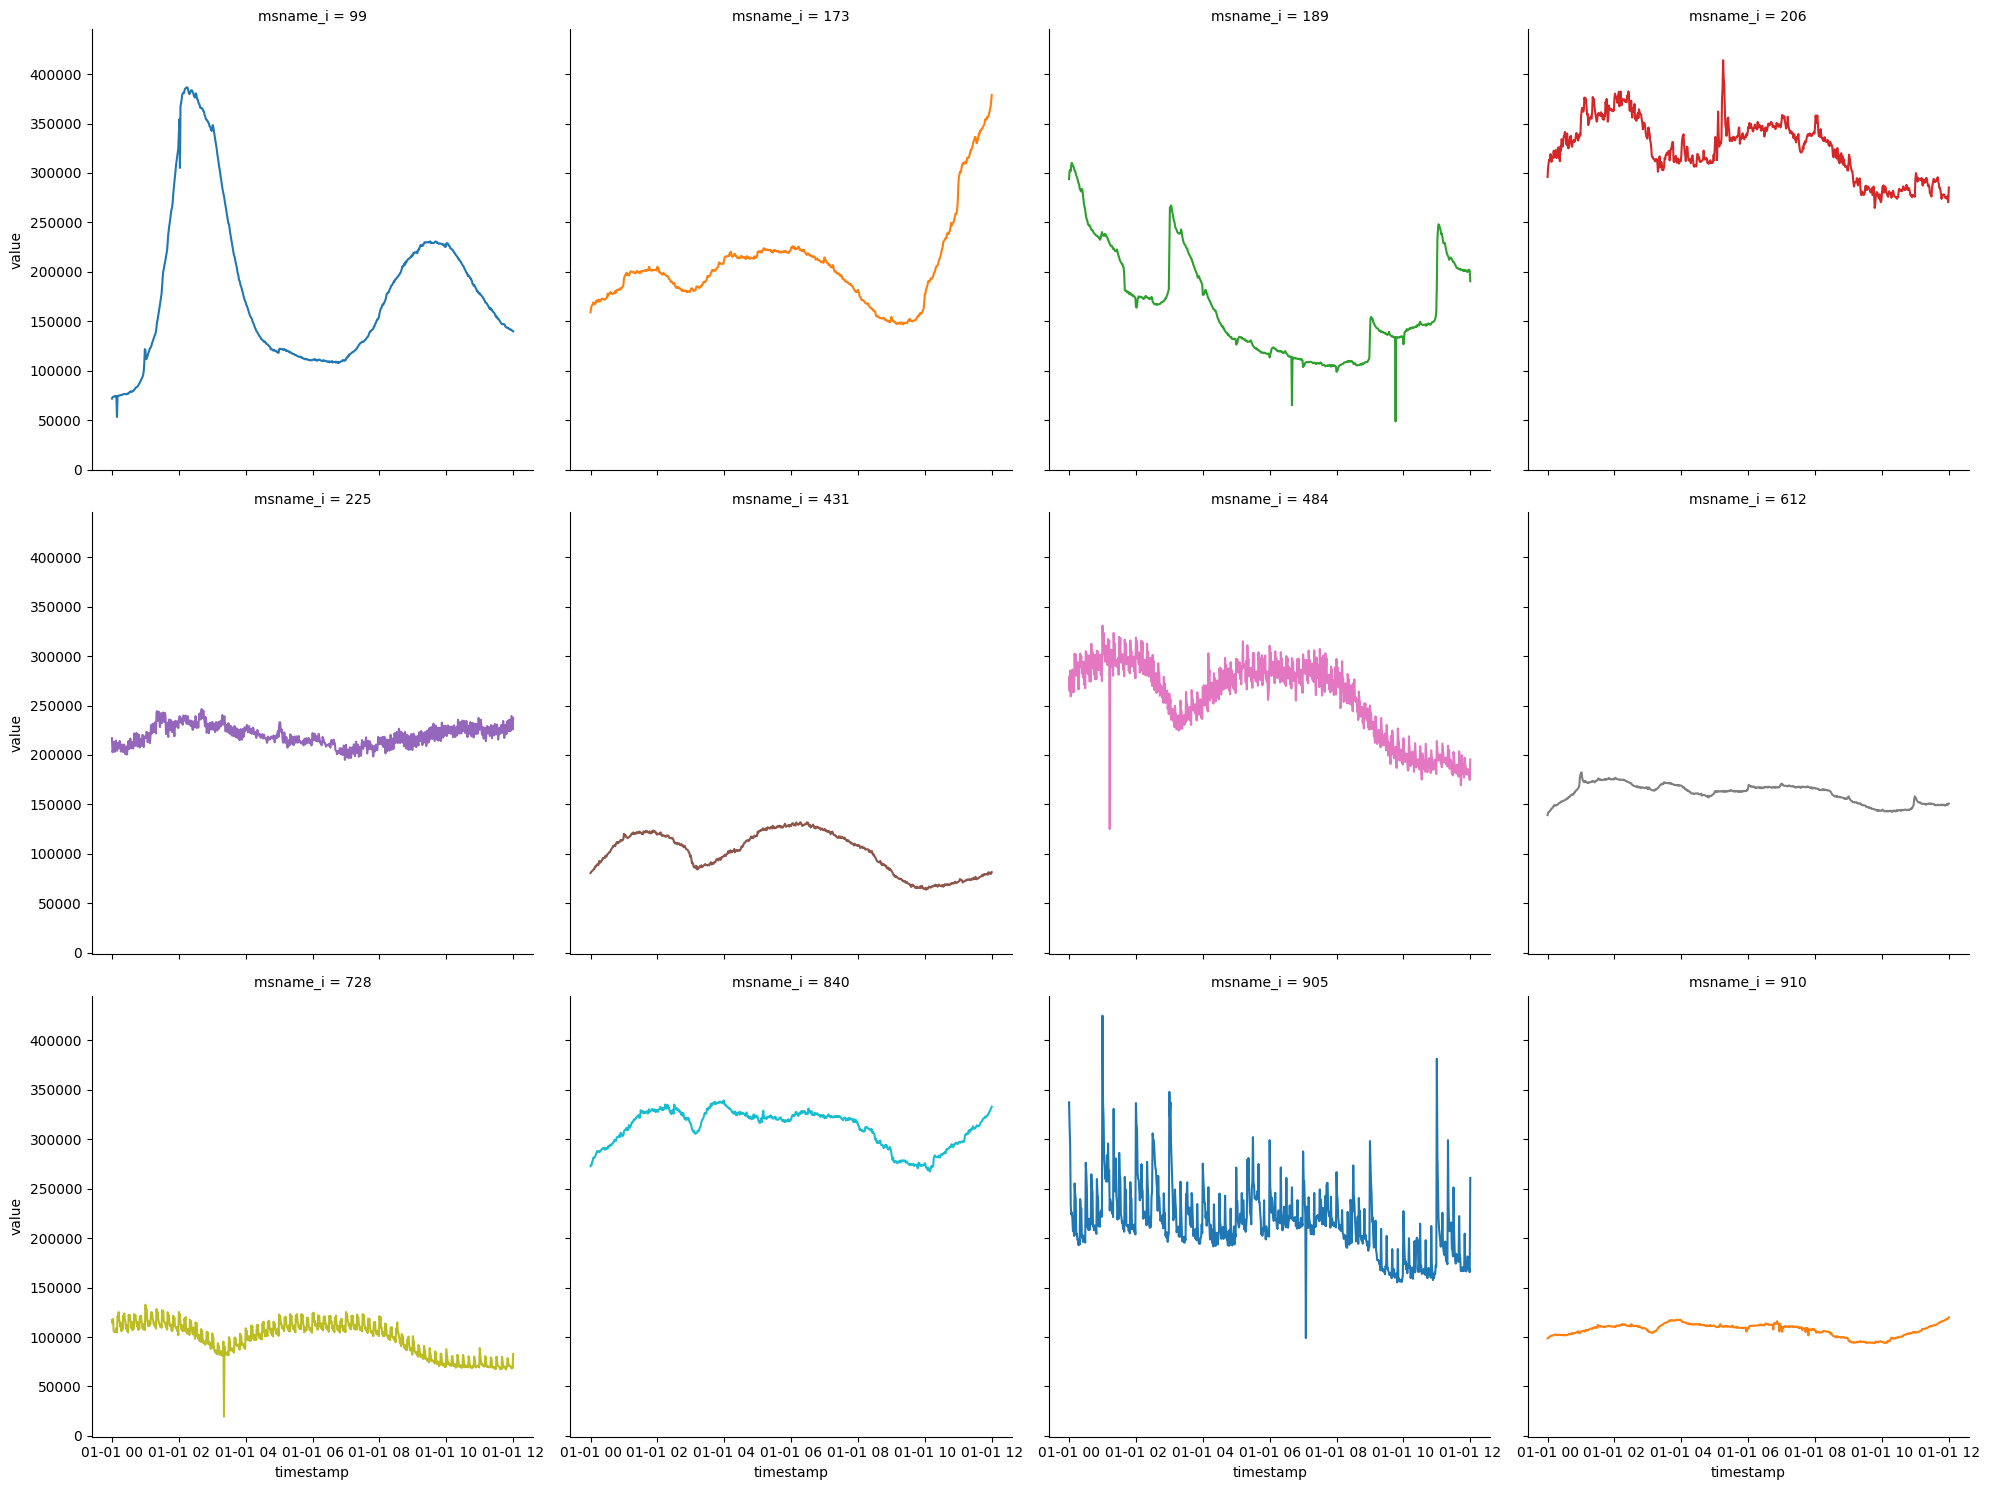

In [11]:
# Let's plot the traces
sns.relplot(data=df_traces, x="timestamp", y="value",
           hue="msname_i", col="msname_i", col_wrap=4,
           kind="line", palette="tab10", legend=False)

Let's add a region and an app label to each trace.

In [12]:
ms2app = {}
ms2reg = {}
ms_names = df_traces.msname_i.unique()
app = 0
reg = 0
for i in ms_names:
    ms2app[i] = app
    ms2reg[i] = reg
    app += 1
    if app == NUM_APPS:
        app = 0
        reg += 1
print(ms2app)
print(ms2reg)

{99: 0, 173: 1, 189: 2, 206: 0, 225: 1, 431: 2, 484: 0, 612: 1, 728: 2, 840: 0, 905: 1, 910: 2}
{99: 0, 173: 0, 189: 0, 206: 1, 225: 1, 431: 1, 484: 2, 612: 2, 728: 2, 840: 3, 905: 3, 910: 3}


In [13]:
df_traces["app"] = df_traces.msname_i.map(ms2app)
df_traces["reg"] = df_traces.msname_i.map(ms2reg)
df_traces

,timestamp,msname_i,metric,value,app,reg
796,1970-01-01 00:00:00,99,consumerRPC_MCR,71791.783333,0,0
1388,1970-01-01 00:00:00,173,consumerRPC_MCR,159039.533333,1,0
1516,1970-01-01 00:00:00,189,consumerRPC_MCR,293839.933333,2,0
1652,1970-01-01 00:00:00,206,consumerRPC_MCR,296018.750000,0,1
1804,1970-01-01 00:00:00,225,consumerRPC_MCR,216989.366667,1,1
...,...,...,...,...,...,...
7510180,1970-01-01 12:00:00,612,consumerRPC_MCR,150839.033333,1,2
7511108,1970-01-01 12:00:00,728,consumerRPC_MCR,82770.816667,2,2
7512004,1970-01-01 12:00:00,840,consumerRPC_MCR,332872.383333,0,3
7512524,1970-01-01 12:00:00,905,consumerRPC_MCR,260884.916667,1,3


In [14]:
# Rename column to a more significant name
df_traces = df_traces.rename(columns={
    "value": "reqs"
})

# Use only the columns we are interested in and use the timestamp as the index
df_traces = df_traces[["timestamp", "app", "reg", "reqs"]]
df_traces.set_index("timestamp", inplace=True)

# Round up because it is assumed that the workload in each period is integer
df_traces.reqs = np.ceil(df_traces.reqs).astype(int)

df_traces

,app,reg,reqs
timestamp,,,
1970-01-01 00:00:00,0,0,71792
1970-01-01 00:00:00,1,0,159040
1970-01-01 00:00:00,2,0,293840
1970-01-01 00:00:00,0,1,296019
1970-01-01 00:00:00,1,1,216990
...,...,...,...
1970-01-01 12:00:00,1,2,150840
1970-01-01 12:00:00,2,2,82771
1970-01-01 12:00:00,0,3,332873


In [15]:
# Resample per hour
final_traces = df_traces.groupby(["reg", "app"]).resample("1H")["reqs"].sum().reset_index()

# The last hour is an outlier, so take it out
final_traces = final_traces[final_traces.timestamp!="1970-01-01 12:00:00"]

final_traces

,reg,app,timestamp,reqs
0,0,0,1970-01-01 00:00:00,4827602
1,0,0,1970-01-01 01:00:00,11731750
2,0,0,1970-01-01 02:00:00,22109809
3,0,0,1970-01-01 03:00:00,15124156
4,0,0,1970-01-01 04:00:00,8152445
...,...,...,...,...
150,3,2,1970-01-01 07:00:00,6546671
151,3,2,1970-01-01 08:00:00,6153433
152,3,2,1970-01-01 09:00:00,5689840
153,3,2,1970-01-01 10:00:00,5983234


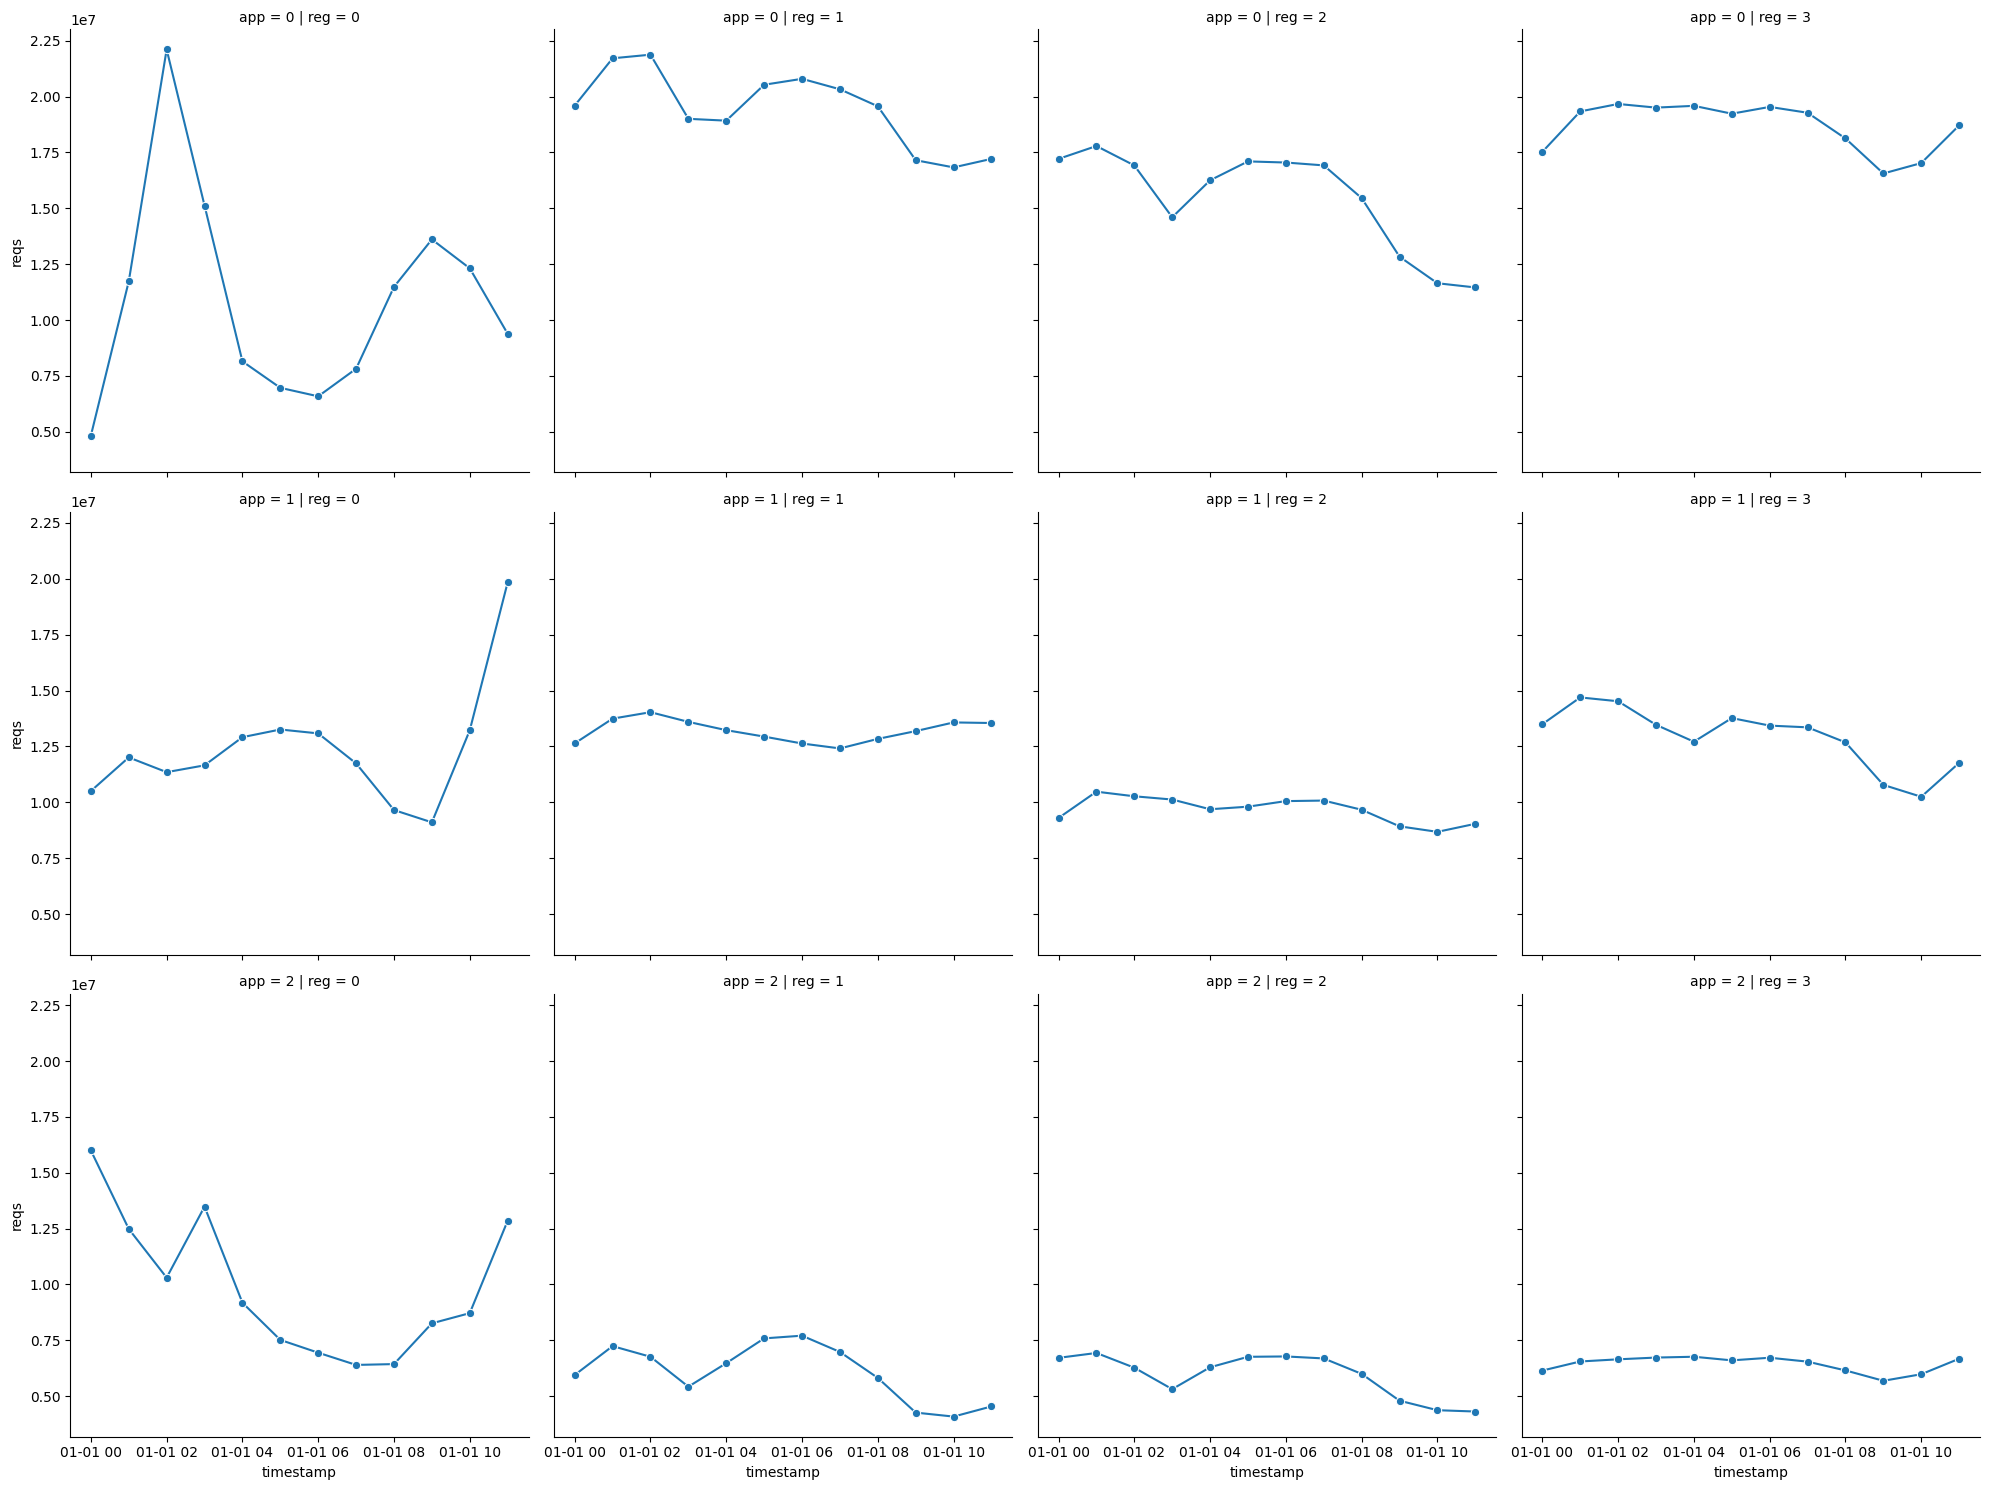

In [16]:
# Plot the traces
sns.relplot(data=final_traces, x="timestamp", y="reqs",
           col="reg", row="app",
           kind="line", marker="o")

In [17]:
# Save to csv
final_traces.set_index("timestamp").to_csv("edge_1h.csv")

In [18]:
!head edge_1h.csv

timestamp,reg,app,reqs
1970-01-01 00:00:00,0,0,4827602
1970-01-01 01:00:00,0,0,11731750
1970-01-01 02:00:00,0,0,22109809
1970-01-01 03:00:00,0,0,15124156
1970-01-01 04:00:00,0,0,8152445
1970-01-01 05:00:00,0,0,6968264
1970-01-01 06:00:00,0,0,6588158
1970-01-01 07:00:00,0,0,7821893
1970-01-01 08:00:00,0,0,11485768
